In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

**Importing the dataset**

In [ ]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
df.shape

(400, 5)

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df_unique=df.nunique().to_frame().reset_index()
df_unique.columns=['Variable','DistinctCount']
df_unique

,Variable,DistinctCount
0,User ID,400
1,Gender,2
2,Age,43
3,EstimatedSalary,117
4,Purchased,2


Convert gender colum to int format.

Male is 0

Female is 1

In [ ]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


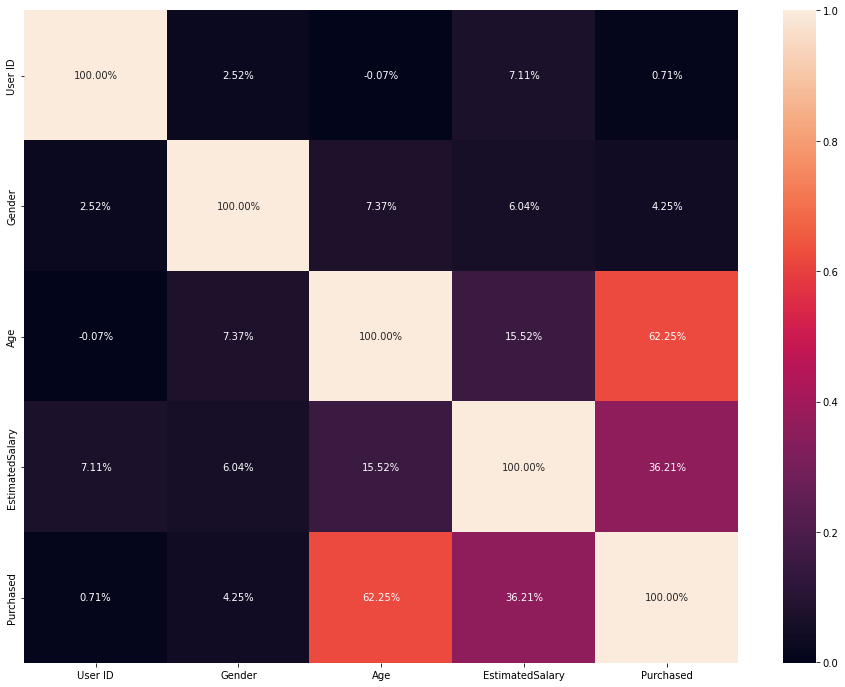

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot = True, fmt = '.2%')

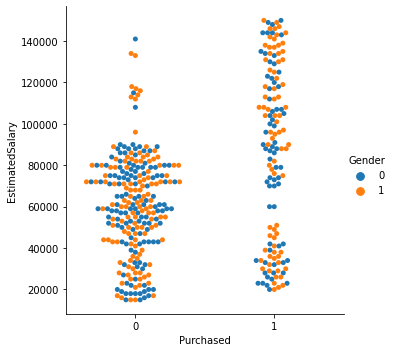

In [ ]:

sns.catplot(x="Purchased", y="EstimatedSalary", hue="Gender", kind="swarm", data=df)

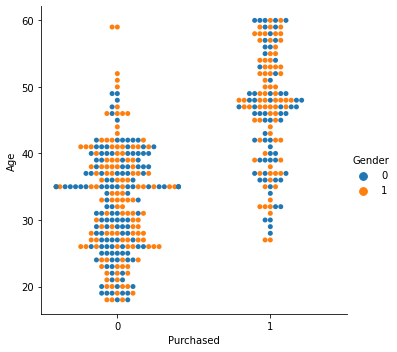

In [ ]:

sns.catplot(x="Purchased", y="Age", hue="Gender", kind="swarm", data=df)

**Splitting the dataset into the Training set and Test set**

In [ ]:
b = []
for i in df.keys():
  b.append(i)
print(b)

['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']


In [ ]:
df = pd.get_dummies(df, columns = ['Gender'])

In [ ]:
df

,User ID,Age,EstimatedSalary,Purchased,Gender_0,Gender_1
0,15624510,19,19000,0,1,0
1,15810944,35,20000,0,1,0
2,15668575,26,43000,0,0,1
3,15603246,27,57000,0,0,1
4,15804002,19,76000,0,1,0
...,...,...,...,...,...,...
395,15691863,46,41000,1,0,1
396,15706071,51,23000,1,1,0
397,15654296,50,20000,1,0,1
398,15755018,36,33000,0,1,0


In [ ]:
b.remove('Purchased')

In [ ]:
b = []
for i in df.keys():
  b.append(i)
print(b)

['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_0', 'Gender_1']


In [ ]:
#X=df[b].values
#y=['Purchased'].values
X = df[b].values#array of features
y = df['Purchased'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

**Fitting K-NN to the Training set**

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train_scaled,y_train) # training the model
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10))) #predicting using the model

K value  :  1  score :  1.0
K value  :  2  score :  1.0
K value  :  3  score :  1.0
K value  :  4  score :  1.0
K value  :  5  score :  1.0
K value  :  6  score :  1.0
K value  :  7  score :  1.0
K value  :  8  score :  1.0
K value  :  9  score :  1.0
K value  :  10  score :  1.0
K value  :  20  score :  1.0
K value  :  50  score :  0.978125


**Predicting the Test set results**

In [ ]:
knn = KNeighborsClassifier(5) #it will initialise the model with @neighbours as k 
knn.fit(X_train_scaled, y_train) # train the model
print("Train Accuracy : ", knn.score(X_train_scaled,y_train)) # test the model and it computes the accuracy (train data accuracy)
print("Val Accuracy : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

Train Accuracy :  1.0
Val Accuracy :  1.0


In [ ]:
results = knn.predict(X_test_scaled)
results

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': results})
df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75,0,0
76,0,0
77,0,0
78,1,1


**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,results)

array([[58,  0],
       [ 0, 22]])

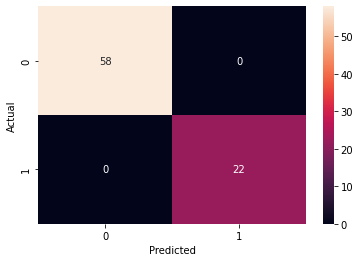

In [ ]:
confusion_matrix = pd.crosstab(y_test, results, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)